# Проект: вариант 2

## Задание 1. A/B–тестирование

1.1 Условие

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

1.2 Входные данные

В качестве входных данных Вы имеете 4 csv-файла:

groups.csv - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 

groups_add.csv - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных

active_studs.csv - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 

checks.csv - файл с информацией об оплатах пользователей в дни проведения эксперимента. 

1.3 Вопросы

Предлагаем Вам ответить на следующие вопросы:

На какие метрики Вы смотрите в ходе анализа и почему?
Имеются ли различия в показателях и с чем они могут быть связаны?
Являются ли эти различия статистически значимыми?
Стоит ли запускать новую механику на всех пользователей?
Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

1.4 Требования к ответу

При выполнении тестового задания необходимо использовать язык программирования Python. 
В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными. 
Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import datetime
from scipy import stats 
import numpy as np
import scipy.stats as ss
from scipy.stats import norm
import pingouin as pg
from tqdm.auto import tqdm
plt.style.use('ggplot')
import pandahouse as ph

#### Загружаю данные через ссылки на файлы на Яндекс.Диске:

In [67]:
import requests 
from urllib.parse import urlencode 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/UhyYx41rTt3clQ' 
 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
download_response = requests.get(download_url) 
groups = pd.read_csv(download_url, sep=';') 

In [3]:
import requests 
from urllib.parse import urlencode 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ' 
 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
download_response = requests.get(download_url) 
groups_add = pd.read_csv(download_url, sep=',') 

In [4]:
import requests 
from urllib.parse import urlencode 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ' 
 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
download_response = requests.get(download_url) 
active_studs = pd.read_csv(download_url, sep=';') 

In [5]:
import requests 
from urllib.parse import urlencode 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/pH1q-VqcxXjsVA' 
 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
download_response = requests.get(download_url) 
checks = pd.read_csv(download_url, sep=';') 

Вспомогательный способ загрузки данных, когда ссылки на файлы на Яндекс.Диске не работают:

In [6]:
# groups = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-pa-kurak/Проект_2_groups.csv', sep=';') 
# groups_add = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-pa-kurak/Проект_2_group_add.csv', sep=',') 
# active_studs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-pa-kurak/Проект_2_active_studs.csv', sep=';') 
# checks = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-pa-kurak/Проект_2_checks.csv', sep=';') 

#### Проведу предварительный анализ данных, в т.ч. проверю на пропущенные значения и дубликаты:

In [7]:
groups

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B


In [8]:
groups.isna().sum()

id     0
grp    0
dtype: int64

In [9]:
groups.duplicated(subset=['id']).sum()

0

In [10]:
groups_add

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


In [11]:
groups_add.isna().sum()

id     0
grp    0
dtype: int64

In [12]:
groups_add.duplicated(subset=['id']).sum()

0

In [13]:
active_studs

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
...,...
8336,1794344
8337,296883
8338,3598448
8339,3610547


In [14]:
active_studs.isna().sum()

student_id    0
dtype: int64

In [15]:
active_studs.duplicated(subset=['student_id']).sum()

0

In [16]:
checks

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


In [17]:
checks.isna().sum()

student_id    0
rev           0
dtype: int64

In [18]:
checks.duplicated(subset=['student_id']).sum()

0

#### По результатам проверки видно, что в данных нет дубликатов или пропущенных значений.

Объединяю данные (изначальные и дополнительные) о принадлежности пользователя к контрольной или экспериментальной группе:

In [19]:
groups_all = groups.append(groups_add, sort=False) \
                   .rename(columns={'id' : 'student_id'})
groups_all

,student_id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


Проверяю, корректность работы сплит-системы, а именно нет ли пользователей, которые попали в обе группы сразу:  

In [20]:
groups_all.duplicated(subset=['student_id']).sum()

0

Добавляю метки "1", обозначающие посещение сайта (activity) и совершение покупки (payment), для удобства при последующих объединениях данных:

In [21]:
active_studs['activity'] = 1
active_studs

,student_id,activity
0,581585,1
1,5723133,1
2,3276743,1
3,4238589,1
4,4475369,1
...,...,...
8336,1794344,1
8337,296883,1
8338,3598448,1
8339,3610547,1


In [22]:
checks['payment'] = 1
checks

,student_id,rev,payment
0,1627,990.0,1
1,3185,690.0,1
2,25973,690.0,1
3,26280,690.0,1
4,100300,990.0,1
...,...,...,...
536,5645737,1900.0,1
537,5651566,1900.0,1
538,5662322,1900.0,1
539,5681918,1900.0,1


Объединяю данные о принадлежности пользователя к контрольной или экспериментальной группе пользователей с данными о пользователях, которые зашли на платформу в дни проведения эксперимента:

In [23]:
active_studs_by_groups = groups_all.merge(active_studs, how='inner', on='student_id')
active_studs_by_groups

,student_id,grp,activity
0,1627,A,1
1,2085,B,1
2,2215,B,1
3,3391,A,1
4,3401,B,1
...,...,...,...
8336,5760471,B,1
8337,5777081,B,1
8338,5870856,A,1
8339,5945085,B,1


Добавляю данные с информацией об оплатах пользователей в дни проведения эксперимента:

In [24]:
all_data = active_studs_by_groups.merge(checks, how='left', on='student_id')
all_data.rev = all_data.rev.fillna(0)
all_data.payment = all_data.payment.fillna(0)
all_data

,student_id,grp,activity,rev,payment
0,1627,A,1,990.0,1.0
1,2085,B,1,0.0,0.0
2,2215,B,1,0.0,0.0
3,3391,A,1,0.0,0.0
4,3401,B,1,0.0,0.0
...,...,...,...,...,...
8336,5760471,B,1,0.0,0.0
8337,5777081,B,1,0.0,0.0
8338,5870856,A,1,0.0,0.0
8339,5945085,B,1,0.0,0.0


### Для анализа эксперимента предлагаю использовать следующие метркии:

 1. **Конверсия в покупку (conversion rate, CR)** - отношение числа пользователей, совершивших оплату в дни проведения эксперимента, к общему числу пользователей, зашедших на платформу в дни проведения эксперимента:

       CR = количество пользователей, совершивших оплату, из зашедших на платформу в дни проведения эксперимента / количество пользователей, зашедших на платформу в дни проведения эксперимента

    **Гипотезы:**
    

    1. Н0 - конверсии в тестовой и контрольной группах не различаются.     
    2. Н1 - конверсии в тестовой и контрольной группах различаются.
    

 2. **ARPPU (Average revenue per paying user)** - средний доход на пользователя, совершившего оплату:

       ARPPU = суммарный доход / количество пользователей, совершивших оплату, из зашедших на платформу в дни проведения эксперимента
    
    **Гипотезы:**
    

    1. Н0 - средние доходы на платящего пользователя в тестовой и контрольной группах не различаются.
    2. Н1 - средние доходы на платящего пользователя в тестовой и контрольной группах различаются.
    
    
 3. **ARPU (Average revenue per user)** - средний доход с привлечённого пользователя:

       ARPU = CR * ARPPU
    
    **Гипотезы:**
    

    1. Н0 - средние доходы на пользователя в тестовой и контрольной группах не различаются.
    2. Н1 - средние доходы на пользователя в тестовой и контрольной группах различаются.
    


#### Определяю значения метрик:

In [25]:
# Создам датафрейм для метрик обеих групп и рассчитаю значения метрик:

metrics = pd.DataFrame()
metrics['studs'] = all_data.query('activity == 1').groupby('grp').agg({'student_id' : 'count'}).student_id
metrics['payments'] = all_data.query('activity == 1 and rev > 0').groupby('grp').agg({'student_id' : 'count'}).student_id
metrics['sums'] = all_data.query('activity == 1').groupby('grp').agg({'rev' : 'sum'}).rev.round(2)
metrics['CR'] = (metrics.payments * 100 / metrics.studs).round(2)
metrics['ARPPU'] = (metrics.sums / metrics.payments).round(2)
metrics['ARPU'] = (metrics.sums / metrics.studs).round(2)
metrics = metrics.reset_index().rename(columns={'index' : 'group'})
metrics 

,group,studs,payments,sums,CR,ARPPU,ARPU
0,A,1538,78,72820.0,5.07,933.59,47.35
1,B,6803,314,394974.0,4.62,1257.88,58.06


Рассчитаю разницу между метриками в контрольной и целевой группах в процентном выражении.

In [26]:
# Для наглядности создам датафрейм с разницей значений метрик и количества пользователей/размера оплат в %:

difference = pd.DataFrame()
diff_studs = round(int(metrics.query('group == "B"').studs) * 100 / int(metrics.query('group == "A"').studs) - 100, 2)
diff_payments = round(int(metrics.query('group == "B"').payments) * 100 / int(metrics.query('group == "A"').payments) - 100, 2)
diff_sums = round(float(metrics.query('group == "B"').sums) * 100 / float(metrics.query('group == "A"').sums) - 100, 2)
diff_CR = round(float(metrics.query('group == "B"').CR) * 100 / float(metrics.query('group == "A"').CR) - 100, 2)
diff_ARPPU = round(float(metrics.query('group == "B"').ARPPU) * 100 / float(metrics.query('group == "A"').ARPPU) - 100, 2)
diff_ARPU = round(float(metrics.query('group == "B"').ARPU) * 100 / float(metrics.query('group == "A"').ARPU) - 100, 2)

row_difference = {'studs, %' : diff_studs, \
                  'payments, %' : diff_payments, \
                  'sums, %' : diff_sums, \
                  'CR, %' : diff_CR, \
                  'ARPPU, %' : diff_ARPPU, \
                  'ARPU, %' : diff_ARPU}
difference = difference.append(row_difference, ignore_index=True)
difference

,"ARPPU, %","ARPU, %","CR, %","payments, %","studs, %","sums, %"
0,34.74,22.62,-8.88,302.56,342.33,442.4


Из полученных результатов видно, что:
 1. Тестовая группа более чем в 4 раза превышает по количеству контрольную группу;
 2. Конверсия в тестовой группе снизилась на 8,88%, а метрики ARPPU и ARPU увеличились на 34,74% и 22,62% соответственно.

#### Рассматриваю изменение конверсии:

Необходимо применить критерий Хи-квадрат (или критерий согласия Пирсона), т.к. это категориальная переменная (покупка либо совершена, либо нет), а данный метод используется для проверки того, соответствует ли категориальная случайная величина выбранному распределению. Должны соблюдаться условия:

- Все наблюдения независимы
- Количество наблюдений в каждой ячейке больше 5

Оба этих условия выполняются, следовательно, гипотезы:

    1. Н0 - конверсии в тестовой и контрольной группах статистически значимо не различаются.     
    2. Н1 - конверсии в тестовой и контрольной группах различаются статистически значимо.


In [27]:
# Создаю таблицу сопряженности:

pd.crosstab(all_data.payment, all_data.grp)

grp,A,B
payment,,
0.0,1460,6489
1.0,78,314


In [28]:
# Визуализирую данные: 

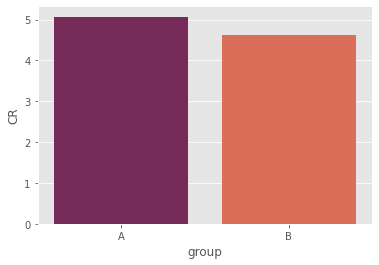

In [29]:
sns.barplot(x='group', y='CR', data=metrics, palette='rocket')

Проверяю данные по критерию Хи-квадрат:

In [30]:
from scipy.stats import chi2_contingency, chi2 
stat, p, dof, expected = chi2_contingency(pd.crosstab(all_data.payment, all_data.grp))
stat, p

(0.48480826522557896, 0.48625240457231045)

Принимая уровень значимости альфа = 5%, по результату теста нет оснований для отклонения нулевой гипотезы, т.к. полученное значение p = 0,48625 > 0.05 и превышает установленный порог, следовательно, можно сделать вывод, что конверсии в группах статистически значимо не различаются.  

#### Вывод:

По результатам эксперимента связь между группой и количеством покупок при заданном уровне значимости не была установлена.

#### Рассматриваю изменение ARPPU:

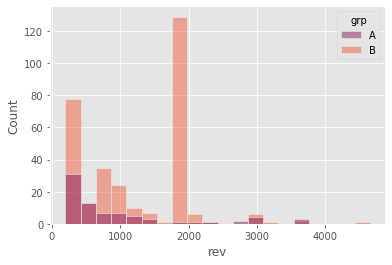

In [31]:
# Визуализирую данные:

sns.histplot(x='rev', data=all_data.query('rev > 0'), hue='grp', bins=20, palette='rocket')

Из графика явно видно, что распределения в обеих группах отличаются от нормального.

In [32]:
# Разделяю датафрейм на тестовую и контрольную группы:

all_data_control_ARPPU = all_data.query('grp == "A" and rev > 0')
all_data_test_ARPPU = all_data.query('grp == "B" and rev > 0')

Визуализирую данные в тестовой и контрольной группах:

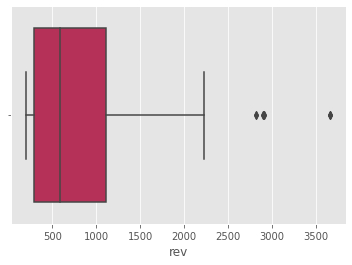

In [33]:
sns.boxplot(data=all_data_control_ARPPU, x='rev', palette='rocket')

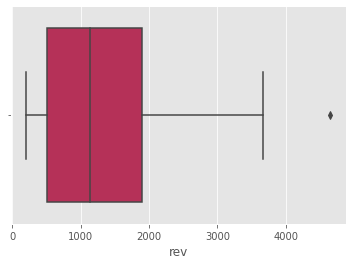

In [34]:
sns.boxplot(data=all_data_test_ARPPU, x='rev', palette='rocket')

#### Условия применения t-test-а:

1) дисперсии внутри групп должны быть примерно одинаковы (требование гомогенности дисперсий). Проверить можно с помощью критерия Левена и критерия Фишера.

2) нормальность данных обеих групп (по причине возможного завышения вероятности ошибки I рода). 

#### Проверю обе группы на нормальность распределения:

In [35]:
stats.shapiro(all_data_control_ARPPU.rev)

ShapiroResult(statistic=0.7353236079216003, pvalue=1.4986822893803264e-10)

In [36]:
stats.shapiro(all_data_test_ARPPU.rev)

ShapiroResult(statistic=0.8547235727310181, pvalue=1.5437024585965894e-16)

Построю QQ-plot-ы для обеих групп:

<Figure size 864x360 with 0 Axes>

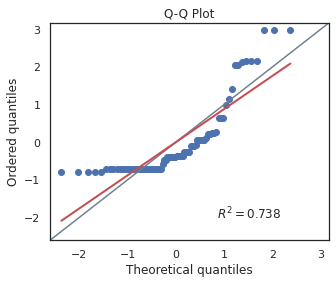

In [37]:
sns.set(
    font_scale=1,
    style="white"
        )
plt.figure(figsize=(12,5))

qq_pg = pg.qqplot(all_data_control_ARPPU.rev, confidence=False)
plt.show()

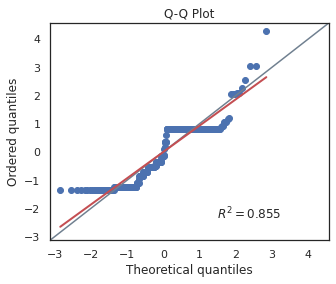

In [38]:
qq_pg = pg.qqplot(all_data_test_ARPPU.rev, confidence=False)
plt.show()

По результатам тестов Шапиро-Уилка можно сделать вывод, что распределение в обеих группах статистически значимо отличается от нормального (нулевая гипотеза о том, что значения распределены нормально, отклоняется по результатам тестов, т.к. p < 0.05).

QQ-plot-ы также наглядно визуализируют отклонение распределений от нормальных.

#### Проверю обе группы на гомогенность дисперсий при помощи теста Левена:

    1. Н0 : дисперсии в контрольной и тестовой группах не различаются.
    2. Н1 : дисперсии в контрольной и тестовой группах различаются.

In [39]:
stats.levene(all_data_control_ARPPU.rev, all_data_test_ARPPU.rev)

LeveneResult(statistic=3.075681699981606, pvalue=0.08025675761347022)

По результатам теста Левена можно сделать вывод, что дисперсии в группах не различаются (p > 0.05), но т.к. распределения в группах статистически значимо отличаются от нормального, то применять t-test к результатам эксперимента некорректно. Т.к U-критерий Манна-Уитни в данном случае может быть неточным, для проверки гипотез буду использовать бутстрап.

#### Объявляю функцию, которая позволит проверять гипотезы с помощью бутстрапа по среднему:

In [40]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

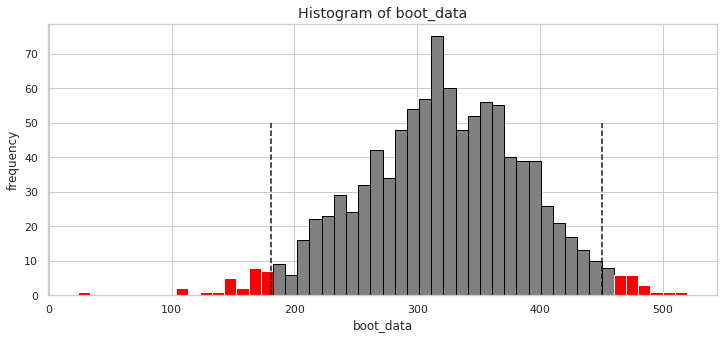

In [41]:
# Использую бутстрап:

sns.set(
    font_scale=1,
    style="whitegrid"
        )
plt.figure(figsize=(12,5))

booted_data_ARPPU = get_bootstrap(all_data_test_ARPPU.rev, all_data_control_ARPPU.rev)

In [42]:
booted_data_ARPPU["p_value"] 

2.521166744913962e-06

In [43]:
booted_data_ARPPU["quants"]

,0
0.025,181.330742
0.975,450.708451


Т.к. 0 не попал в доверительный интервал и p < 0.05, то нулевую гипотезу можно отклонить и средние значения в тестовой и контрольной группах значимо различаются, т.е. другими словами, наблюдаются статистически значимые различия между средними ARPPU в обеих группах.

#### Рассматриваю изменение ARPU:

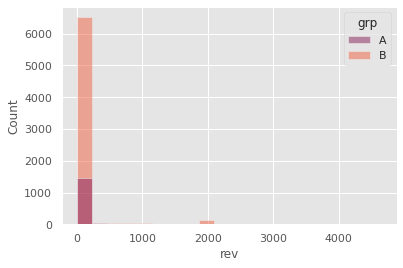

In [44]:
# Визуализирую данные:

sns.histplot(x='rev', data=all_data, hue='grp', bins=20, palette='rocket')

Из графика явно видно, что распределения в обеих группах отличаются от нормального.

In [45]:
# Разделяю датафрейм на тестовую и контрольную группы:

all_data_control_ARPU = all_data.query('grp == "A"')
all_data_test_ARPU = all_data.query('grp == "B"')

#### Проверю обе группы на нормальность распределения:

In [46]:
stats.shapiro(all_data_control_ARPU.rev)

ShapiroResult(statistic=0.1541670560836792, pvalue=0.0)

In [47]:
stats.shapiro(all_data_test_ARPU.rev)

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.18124502897262573, pvalue=0.0)

Построю QQ-plot-ы для обеих групп:

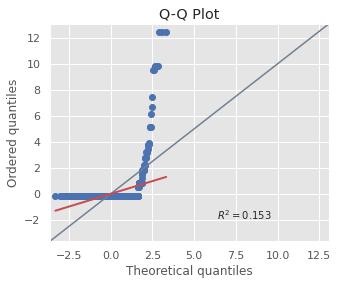

In [48]:
qq_pg = pg.qqplot(all_data_control_ARPU.rev, confidence=False)
plt.show()

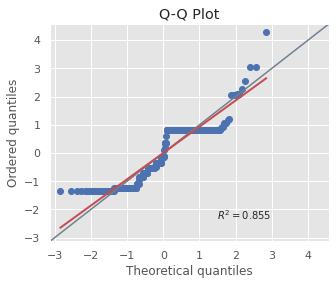

In [49]:
qq_pg = pg.qqplot(all_data_test_ARPPU.rev, confidence=False)
plt.show()

По результатам тестов Шапиро-Уилка можно сделать вывод, что распределение в обеих группах статистически значимо отличается от нормального (нулевая гипотеза о том, что значения распределены нормально, отклоняется по результатам тестов, т.к. p < 0.05).

QQ-plot-ы также наглядно визуализируют отклонение распределений от нормальных.

Следовательно, по аналогии с ARPPU, для проверки гипотез буду использовать бутстрап.

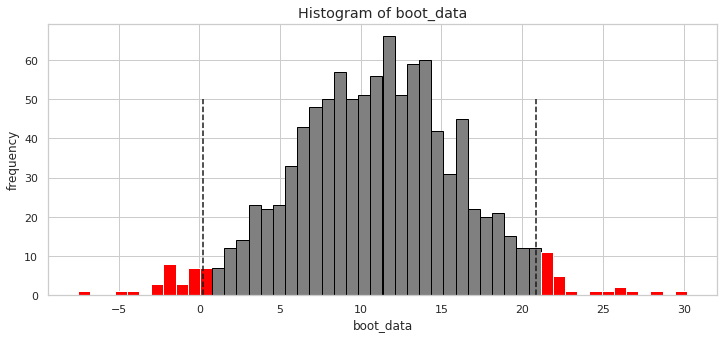

In [50]:
# Визуализирую данные и использую бутстрап:

sns.set(
    font_scale=1,
    style="whitegrid"
        )
plt.figure(figsize=(12,5))

booted_data_ARPU = get_bootstrap(all_data_test_ARPU.rev, all_data_control_ARPU.rev)

In [51]:
booted_data_ARPU["p_value"] 

0.03640524851171103

In [52]:
booted_data_ARPU["quants"]

,0
0.025,0.259915
0.975,20.825394


Т.к. 0 не попал в доверительный интервал и p < 0.05, то нулевую гипотезу можно отклонить и средние значения в тестовой и контрольной группах значимо различаются, т.е. другими словами, наблюдаются статистически значимые различия между средними ARPU в обеих группах.

### Выводы:

По результатам бутстрапа выявлены статистически значимые различия метрик ARPPU, ARPU в тестовой и контрольной группах (они выросли на 34,74% и 22,62% соответственно) и не выявлено значимое различие в конверсиях между группами.

Стоит отметить, что, возможно, система сплитования работает не совсем корректно: тестовая группа более чем в 4 раза превышает по количеству контрольную группу, а также в тестовой группе есть оплаты, резко выделяющиеся на фоне остальных по сумме и подобные им отсутствуют в контрольной группе. 

На мой взгляд, следует увеличить размер контрольной группы для последующего перезапуска эксперимента, в этом случае эксперимент будет более корректным. Также явно стоит проанализировать пользователей с высоким чеком оплаты в тестовой группе, либо в целом сегментировать пользователей по сумме оплат и посмотреть на различия метрик по группам уже непостредственно в разрезе сегментов.

Однако, если по каким-либо причинам перезапуск эксперимента невозможен и ошибок в системе сплитования нет, то на основании статистически значимого по результатам бутстрапа роста метрик ARPPU, ARPU можно попробовать запустить новую механику оплаты.

П.С. 
 Ради интереса (без оформления результатов) я посмотрела на расчеты без дополнительных данных из файла group_add, результаты тестов не изменились.

## Задание 2. SQL

2.1 Очень усердные ученики.

2.1.1 Условие

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".

Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

2.1.2 Задача

Дана таблица default.peas:

Название атрибута	Тип атрибута	Смысловое значение

st_id	int	ID ученика

timest	timestamp	Время решения карточки

correct	bool	Правильно ли решена горошина?

subject	text	Дисциплина, в которой находится горошина


Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов.NB! Под усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц.

2.2 Оптимизация воронки

2.2.1 Условие

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

2.2.2 Задача

Дана таблицы: default.peas (см. выше), default.studs:

Название атрибута	Тип атрибута	Смысловое значение

st_id	int	 ID ученика

test_grp	text	 Метка ученика в данном эксперименте

и default.final_project_check:

Название атрибута	Тип атрибута	Смысловое значение

st_id	int 	ID ученика

sale_time	timestamp	Время покупки

money	int	Цена, по которой приобрели данный курс

subject	text 	

Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

ARPU 

ARPAU 

CR в покупку 

СR активного пользователя в покупку 

CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике

ARPU считается относительно всех пользователей, попавших в группы.

Активным считается пользователь, за все время решивший больше 10 задач правильно в любых дисциплинах.

Активным по математике считается пользователь, за все время решивший 2 или больше задач правильно по математике.

Все данные находятся в табличном виде в ClickHouse

### 2.1.2 Задача

In [53]:
# Подключаюсь к ClickHouse:

connection_default = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [54]:
# Создаю нужный запрос, db автоматически заменится на значение из database:

q1 = '''
     SELECT 
        COUNT(*) AS great_students
    FROM 
        (
        SELECT 
            st_id AS id              
        FROM {db}.peas
        WHERE  
            toStartOfMonth(timest) = toStartOfMonth(now())  
            AND  correct = 1
        GROUP BY  
            id 
        HAVING
            SUM(correct) >= 20 
        )
    '''

# Отправляю запрос и записываю результат в датафрейм:

q_test = ph.read_clickhouse(query=q1, connection=connection_default)
q_test

,great_students
0,0


Количество очень усердных студентов равно нулю, т.к. в таблице есть данные только за 30 и 31 октября 2021 года.
Приму в данном случае за текущий месяц октябрь 2021 года и скорректирую запрос соответствующим образом:


In [55]:
q1 = '''
     SELECT 
        COUNT(*) AS great_students
    FROM 
        (
        SELECT 
            st_id AS id              
        FROM {db}.peas
        WHERE  
            correct = 1
        GROUP BY  
            id 
        HAVING
            SUM(correct) >= 20 
        )
    '''
q_test = ph.read_clickhouse(query=q1, connection=connection_default)
q_test

,great_students
0,136


По результату запроса получаю, что имеется 136 очень усердных студентов.

### 2.2.2 Задача

Для решения задачи я использовала подзапросы и объявляла различные параметры для последующего расчета метрик при помощи WITH, а затем объединяла все по колонке test_grp.

In [56]:
# Создаю нужный запрос:

q2 = '''
WITH
-- Число пользователей по группам:
    all_students AS 
        (SELECT 
            studs.test_grp AS test_group,
            uniqExact(studs.st_id) AS all_students
        FROM
            {db}.peas 
        RIGHT JOIN
            {db}.studs 
        ON
            studs.st_id = peas.st_id
        GROUP BY
            test_group
        ),
 -- Число активных пользователей по группам:
    active_students AS 
        (SELECT 
            studs.test_grp AS test_group,
            uniqExact(peas.st_id) AS active_students
        FROM
            (SELECT
                peas.st_id AS st_id,
                sum(peas.correct) AS correct
            FROM
                {db}.peas 
            GROUP BY
                st_id
            HAVING
                correct > 10
            ) AS peas 
        JOIN
            {db}.studs 
        ON
            studs.st_id = peas.st_id
        GROUP BY
            test_group
        ),       
-- Общий доход от платящих пользователей и количество платящих пользователей по группам:     
    revenue AS 
        (SELECT
            studs.test_grp AS test_group,
            SUM(final_project_check.money) AS all_revenue,
            uniqExact(final_project_check.st_id) AS paying_students
        FROM
            {db}.studs 
        RIGHT JOIN
            {db}.final_project_check
        ON
            studs.st_id = final_project_check.st_id
        GROUP BY
            test_group
        ),
-- Общий доход от активных пользователей и количество активных платящих пользователей по группам:
    active_revenue AS 
        (SELECT 
            final_project_check_studs.test_group AS test_group,
            SUM(final_project_check_studs.money) AS active_revenue,
            uniqExact(final_project_check_studs.st_id) AS active_paying_students
        FROM
            (SELECT 
                studs.test_grp AS test_group,
                final_project_check.st_id AS st_id,
                final_project_check.money AS money
            FROM
                {db}.final_project_check
            JOIN
                {db}.studs
            ON
                studs.st_id = final_project_check.st_id    
            GROUP BY
                test_group,
                st_id,
                money
            ) AS final_project_check_studs
            JOIN
                (SELECT
                    peas.st_id AS st_id,
                    sum(peas.correct) AS correct
                FROM 
                    {db}.peas
                GROUP BY
                    st_id
                HAVING
                    correct > 10
                ) AS peas 
            ON 
                peas.st_id = final_project_check_studs.st_id 
            GROUP BY
                test_group
        ),
-- Число активных пользователей по математике по группам:    
    active_math_students AS 
        (SELECT
            studs.test_grp AS test_group,
            uniqExact(peas.st_id) AS active_math_students
        FROM
        (SELECT
            peas.st_id AS st_id,
            sum(peas.correct) AS correct
        FROM 
            {db}.peas
        WHERE
            peas.subject = 'Math'
        GROUP BY
            st_id
        HAVING
            correct >= 2
        ) AS peas 
        JOIN
            {db}.studs 
        ON
            peas.st_id = studs.st_id
        GROUP BY
            test_group
        ),
-- Число активных пользователей по математике, купивших курс по математике, по группам:     
    paying_active_math_students AS 
    (SELECT
        final_project_check_studs.test_group AS test_group,
        uniqExact(final_project_check_studs.st_id) AS paying_active_math_students
    FROM
        (SELECT
            peas.st_id AS st_id,
            sum(peas.correct) AS correct
        FROM 
                {db}.peas
        WHERE
            peas.subject = 'Math'
        GROUP BY
            st_id
        HAVING
            correct >= 2
        ) AS peas 
    JOIN
        (SELECT
            studs.test_grp AS test_group,
            final_project_check.st_id AS st_id
        FROM
            {db}.final_project_check
        JOIN
            {db}.studs
        ON
            final_project_check.st_id = studs.st_id
        WHERE
            final_project_check.subject = 'Math'
        GROUP BY
            test_group,
            st_id
        ) AS final_project_check_studs
    ON
        peas.st_id = final_project_check_studs.st_id
    GROUP BY
        test_group
    )
SELECT
    all_students.test_group AS test_group,
    ROUND((revenue.all_revenue / all_students.all_students), 2) AS ARPU,
    ROUND((active_revenue.active_revenue / active_students.active_students), 2) AS ARPAU,
    ROUND((revenue.paying_students * 100 / all_students.all_students), 2) AS CR,
    ROUND((active_revenue.active_paying_students * 100 / active_students.active_students), 2) AS CR_active,
    ROUND((paying_active_math_students.paying_active_math_students * 100 / active_math_students.active_math_students), 2) AS CR_active_math
FROM
    all_students
JOIN
    active_students
ON
    all_students.test_group = active_students.test_group
JOIN
    revenue
ON
    all_students.test_group = revenue.test_group
JOIN
    active_revenue
ON
    all_students.test_group = active_revenue.test_group
JOIN
    active_math_students
ON
    all_students.test_group = active_math_students.test_group
JOIN
    paying_active_math_students
ON
    all_students.test_group = paying_active_math_students.test_group
GROUP BY
    test_group,
    ARPU,
    ARPAU,
    CR,
    CR_active,
    CR_active_math
    '''

# Отправляю запрос и записываю результат в датафрейм:

q_test = ph.read_clickhouse(query=q2, connection=connection_default)
q_test

,test_group,ARPU,ARPAU,CR,CR_active,CR_active_math
0,pilot,11508.47,29739.58,10.85,26.04,9.52
1,control,4540.98,10393.70,4.92,11.02,6.12


## Задание 3. Python

### 3.1 Задача

Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.
Реализуйте функцию, которая будет строить графики по получаемым метрикам.

Предварительно создам функцию бутстрапа без вывода визуализаций и тайминга выполнения функции:

In [57]:
def get_bootstrap_without_visualisation(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    for i in range(boot_it): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
              
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

Создам функцию, которая будет принимать на вход все основные датафреймы и датафрейм с дополнительными данными groups_add (файлы с расширением csv) и возвращать датафрейм с метриками из первого задания:

In [58]:
def metrics_with_additional_data(groups, active_studs, checks, groups_add):
    
    # Заменяю названия колонок в датафрейме с дополнительными данными (на случай несовпадения):        
    groups_add = groups_add.rename(columns={groups_add.columns[0] : 'id', groups_add.columns[1] : 'grp'})
    
    # Объединяю данные о принадлежности пользователя к контрольной или экспериментальной группе:
    groups_all = groups.append(groups_add, sort=False) \
                       .rename(columns={'id' : 'student_id'})
    
    # Добавляю метки "1", обозначающие посещение сайта (activity) и совершение покупки (payment):
    active_studs['activity'] = 1
    checks['payment'] = 1
    
    # Объединяю данные о принадлежности пользователя к группе пользователей с данными об активных пользователях:
    active_studs_by_groups = groups_all.merge(active_studs, how='inner', on='student_id')
    
    # Добавляю данные с информацией об оплатах пользователей:
    all_data = active_studs_by_groups.merge(checks, how='left', on='student_id')
    all_data.rev = all_data.rev.fillna(0)
    all_data.payment = all_data.payment.fillna(0)
    
    # Создам датафрейм для метрик обеих групп и рассчитаю значения метрик:
    metrics = pd.DataFrame()
    metrics['studs'] = all_data.query('activity == 1').groupby('grp').agg({'student_id' : 'count'}).student_id
    metrics['payments'] = all_data.query('activity == 1 and rev > 0').groupby('grp').agg({'student_id' : 'count'}).student_id
    metrics['sums'] = all_data.query('activity == 1').groupby('grp').agg({'rev' : 'sum'}).rev.round(2)
    metrics['CR'] = (metrics.payments * 100 / metrics.studs).round(2)
    metrics['ARPPU'] = (metrics.sums / metrics.payments).round(2)
    metrics['ARPU'] = (metrics.sums / metrics.studs).round(2)
    metrics = metrics.reset_index().rename(columns={'index' : 'group'})
    
    # Для наглядности создам датафрейм с разницей значений метрик и количества пользователей/размера оплат в %:
    difference = pd.DataFrame()
    diff_studs = round(int(metrics.query('group == "B"').studs) * 100 / int(metrics.query('group == "A"').studs) - 100, 2)
    diff_payments = round(int(metrics.query('group == "B"').payments) * 100 / int(metrics.query('group == "A"').payments) - 100, 2)
    diff_sums = round(float(metrics.query('group == "B"').sums) * 100 / float(metrics.query('group == "A"').sums) - 100, 2)
    diff_CR = round(float(metrics.query('group == "B"').CR) * 100 / float(metrics.query('group == "A"').CR) - 100, 2)
    diff_ARPPU = round(float(metrics.query('group == "B"').ARPPU) * 100 / float(metrics.query('group == "A"').ARPPU) - 100, 2)
    diff_ARPU = round(float(metrics.query('group == "B"').ARPU) * 100 / float(metrics.query('group == "A"').ARPU) - 100, 2)

    row_difference = {'studs, %' : diff_studs, \
                      'payments, %' : diff_payments, \
                      'sums, %' : diff_sums, \
                      'CR, %' : diff_CR, \
                      'ARPPU, %' : diff_ARPPU, \
                      'ARPU, %' : diff_ARPU}
    difference = difference.append(row_difference, ignore_index=True)
    
    # Проверка изменения метрик на статистическую значимость:    
    
    # Проверяю конверсию по критерию Хи-квадрат:
    from scipy.stats import chi2_contingency, chi2 
    stat, p, dof, expected = chi2_contingency(pd.crosstab(all_data.payment, all_data.grp))
    stat, p    
    # Проверяю ARPPU при помощи бутстрапа:
    all_data_control_ARPPU = all_data.query('grp == "A" and rev > 0')
    all_data_test_ARPPU = all_data.query('grp == "B" and rev > 0')
    booted_data_ARPPU = get_bootstrap_without_visualisation(all_data_test_ARPPU.rev, all_data_control_ARPPU.rev)        
    # Проверяю ARPU при помощи бутстрапа:
    all_data_control_ARPU = all_data.query('grp == "A"')
    all_data_test_ARPU = all_data.query('grp == "B"')
    booted_data_ARPU = get_bootstrap_without_visualisation(all_data_test_ARPU.rev, all_data_control_ARPU.rev)
    
    # Составляю функцию для вывода результата о статистической значимости:
    def p_bool(x):
        if x < 0.05:
            return True
        else: 
            return False
    
    # Для наглядности создам датафрейм с результатами проверки изменения метрик на статистическую значимость:
    stat_significance = pd.DataFrame()
    row_stat_significance = {'p_CR' : p, \
                             'p_ARPPU' : booted_data_ARPPU["p_value"], \
                             'p_ARPU' : booted_data_ARPU["p_value"]}
    stat_significance =  stat_significance.append(row_stat_significance, ignore_index=True)
    stat_significance['stat_significant_ARPPU'] = stat_significance.p_ARPPU.apply(lambda x: p_bool(x))
    stat_significance['stat_significant_ARPU'] = stat_significance.p_ARPU.apply(lambda x: p_bool(x))
    stat_significance['stat_significant_CR'] = stat_significance.p_CR.apply(lambda x: p_bool(x))
    
    return {'metrics' : metrics,
            'difference, %' : difference,
            'p' : stat_significance}
     

Проверяю работу функции на всех основных датафреймах из первого задания, включая датафрейм с дополнительными данными groups_add: 

In [59]:
groups = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-pa-kurak/Проект_2_groups.csv', sep=';')
active_studs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-pa-kurak/Проект_2_active_studs.csv', sep=';')
checks = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-pa-kurak/Проект_2_checks.csv', sep=';')
groups_add = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-pa-kurak/Проект_2_group_add.csv', sep=',')

In [60]:
metrics_with_additional_data(groups, active_studs, checks, groups_add)['metrics']

,group,studs,payments,sums,CR,ARPPU,ARPU
0,A,1538,78,72820.0,5.07,933.59,47.35
1,B,6803,314,394974.0,4.62,1257.88,58.06


In [61]:
metrics_with_additional_data(groups, active_studs, checks, groups_add)['difference, %']

,"ARPPU, %","ARPU, %","CR, %","payments, %","studs, %","sums, %"
0,34.74,22.62,-8.88,302.56,342.33,442.4


In [62]:
metrics_with_additional_data(groups, active_studs, checks, groups_add)['p']

,p_ARPPU,p_ARPU,p_CR,stat_significant_ARPPU,stat_significant_ARPU,stat_significant_CR
0,0.000001,0.038389,0.486252,True,True,False


Создам функцию, которая будет принимать на вход датафрейм с рассчитанными метриками metrics_with_additional_data()['metrics']  и строить графики по получаемым метрикам:

In [65]:
def visualisation_metrics_with_additional_data(df):
 
    sns.set(
            font_scale=1,
            style="whitegrid"
            )
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), sharey='col', sharex=True)
    
    sns.barplot(x="group", y="CR", data=df, ax=axes[0], palette='rocket').set_title('CR')
    sns.barplot(x="group", y="ARPPU", data=df, ax=axes[1], palette='rocket').set_title('ARPPU')
    sns.barplot(x="group", y="ARPU", data=df, ax=axes[2], palette='rocket').set_title('ARPU')

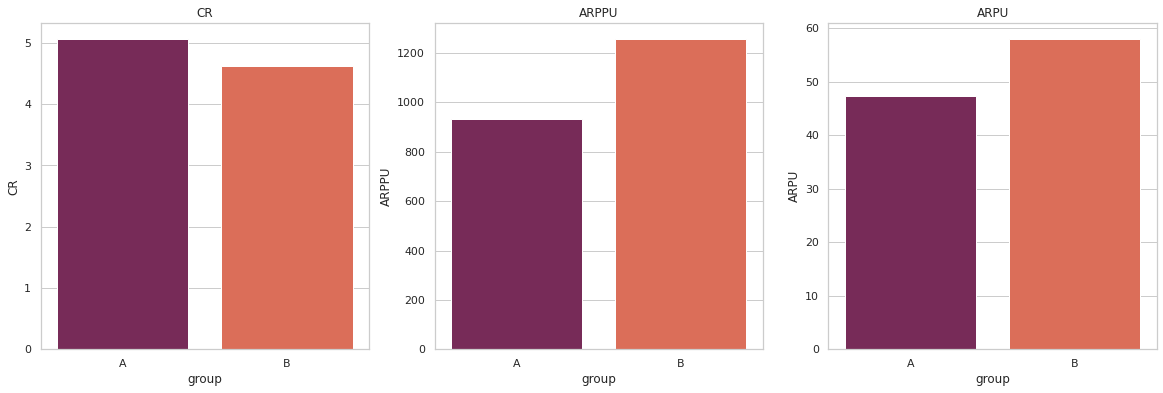

In [66]:
visualisation_metrics_with_additional_data(metrics_with_additional_data(groups, active_studs, checks, groups_add)['metrics'])